In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv("Survey_data - Sheet1 (1).csv")
data.head(5)

,Program_level,Frequency_of_use,Library_adequacy,Library_quality,LH_adequacy,LH_quality,Lab_adequacy,Lab_quality,Overall_satisfaction
0,Degree,Daily,5.0,5.0,5.0,5.0,5.0,5.0,1.0
1,Degree,Daily,4.0,4.0,1.0,4.0,4.0,4.0,1.0
2,Degree,Weekly,4.0,4.0,2.0,2.0,3.0,3.0,1.0
3,Degree,Weekly,4.0,3.0,4.0,4.0,2.0,2.0,0.0
4,Degree,Daily,5.0,NaN,5.0,5.0,4.0,3.0,1.0


In [60]:
data.info

<bound method DataFrame.info of      Program_level Frequency_of_use  ...  Lab_quality  Overall_satisfaction
0           Degree            Daily  ...          5.0                   1.0
1           Degree            Daily  ...          4.0                   1.0
2           Degree           Weekly  ...          3.0                   1.0
3           Degree           Weekly  ...          2.0                   0.0
4           Degree            Daily  ...          3.0                   1.0
..             ...              ...  ...          ...                   ...
105         Degree          Monthly  ...          3.0                   0.0
106         Degree          Monthly  ...          4.0                   1.0
107        Diploma           Rarely  ...          4.0                   1.0
108  Post graduate           Rarely  ...          5.0                   1.0
109         Degree              NaN  ...          5.0                   1.0

[110 rows x 9 columns]>

In [61]:
data.describe()

,Library_adequacy,Library_quality,LH_adequacy,LH_quality,Lab_adequacy,Lab_quality,Overall_satisfaction
count,106.000000,103.000000,108.000000,108.000000,98.000000,98.000000,109.000000
mean,3.490566,3.582524,3.583333,3.685185,3.459184,3.438776,0.743119
std,0.907590,0.934358,1.005824,0.943726,0.986176,1.055827,0.438931
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000
50%,3.000000,4.000000,4.000000,4.000000,3.500000,3.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Program_level         110 non-null    object 
 1   Frequency_of_use      95 non-null     object 
 2   Library_adequacy      106 non-null    float64
 3   Library_quality       103 non-null    float64
 4   LH_adequacy           108 non-null    float64
 5   LH_quality            108 non-null    float64
 6   Lab_adequacy          98 non-null     float64
 7   Lab_quality           98 non-null     float64
 8   Overall_satisfaction  109 non-null    float64
dtypes: float64(7), object(2)
memory usage: 7.9+ KB


In [63]:
print(data.isnull().sum())

Program_level            0
Frequency_of_use        15
Library_adequacy         4
Library_quality          7
LH_adequacy              2
LH_quality               2
Lab_adequacy            12
Lab_quality             12
Overall_satisfaction     1
dtype: int64


In [64]:
#dropping data that does not have row with overall satisafaction
data = data.dropna(subset=['Overall_satisfaction'])

# Select only categorical (non-numeric) columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# Fill missing values in each categorical column with its mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Select only numeric columns and fill with mean
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 0 to 109
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Program_level         109 non-null    object 
 1   Frequency_of_use      109 non-null    object 
 2   Library_adequacy      109 non-null    float64
 3   Library_quality       109 non-null    float64
 4   LH_adequacy           109 non-null    float64
 5   LH_quality            109 non-null    float64
 6   Lab_adequacy          109 non-null    float64
 7   Lab_quality           109 non-null    float64
 8   Overall_satisfaction  109 non-null    float64
dtypes: float64(7), object(2)
memory usage: 8.5+ KB


C:\Users\SIPHANE\AppData\Local\Temp\ipykernel_16660\3756283531.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].fillna(data[col].mode()[0])
C:\Users\SIPHANE\AppData\Local\Temp\ipykernel_16660\3756283531.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())


In [65]:
# Change 'weekly' to 'Weekly' in the 'frequency of use' column
data['Frequency_of_use'] = data['Frequency_of_use'].replace('weekly', 'Weekly')


C:\Users\SIPHANE\AppData\Local\Temp\ipykernel_16660\2536181011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Frequency_of_use'] = data['Frequency_of_use'].replace('weekly', 'Weekly')


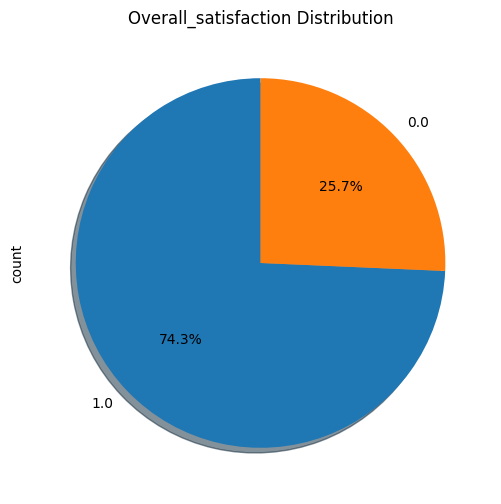

In [ ]:
# pie chart of Overall_satisfaction
data['Overall_satisfaction'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=True, 
    figsize=(6,6),
    title='Overall_satisfaction Distribution'
)

plt.show()

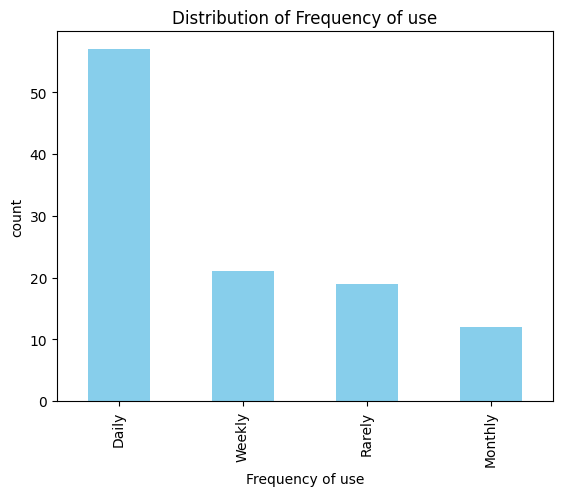

In [ ]:
#Barchart explaining frequency of use
data["Frequency_of_use"].value_counts().plot(kind="bar",color="skyblue")
plt.title("Distribution of Frequency of use")
plt.xlabel("Frequency of use")
plt.ylabel("count")
plt.show()



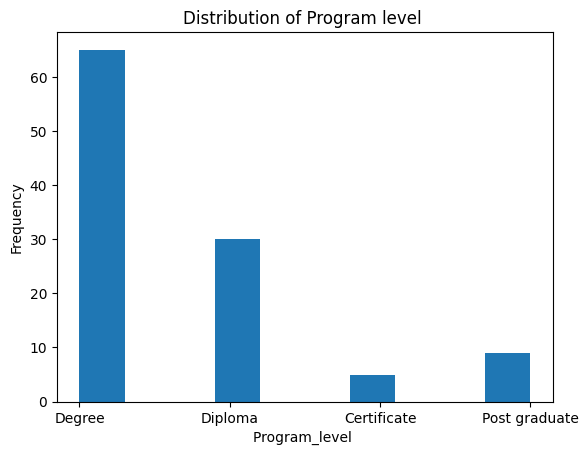

In [68]:
#histogram of the distribution of program levels
plt.hist(data ["Program_level"])
plt.title("Distribution of Program level ")
plt.xlabel("Program_level ")
plt.ylabel("Frequency")
plt.show()

<Axes: >

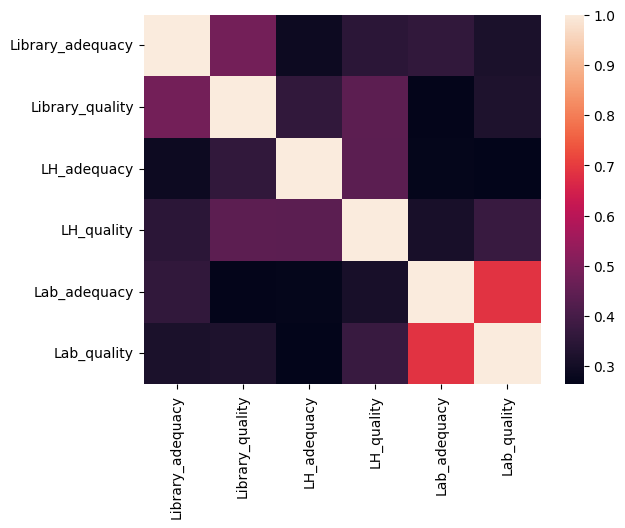

In [ ]:
#finding correlation
correlation = data.select_dtypes("number").drop(columns="Overall_satisfaction").corr()
correlation
sns.heatmap(correlation)


In [70]:
#Split Data
target= "Overall_satisfaction"
X= data.drop(columns=[target, "Program_level", "Frequency_of_use"])
y= data[target]

In [71]:
#randomized train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (87, 6)
y_train shape: (87,)
X_test shape: (22, 6)
y_test shape: (22,)


In [72]:
#baseline accuracy
acc_baseline=y_train.value_counts(normalize=True).max()
print("baseline Accuracy:", round(acc_baseline,2))


baseline Accuracy: 0.7


In [87]:
#build model
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LogisticRegression(max_iter=1000)
)

#fitting the model
model.fit( X_train,y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=[], use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [74]:
#accuracy score
accuracy_score(y_train,model.predict(X_train))
model.score(X_test,y_test)

0.8181818181818182

In [75]:
acc_train=accuracy_score(y_train,model.predict(X_train))
acc_test=model.score(X_test,y_test)
print("Training Accuracy:", round(acc_train,2))
print("Test Accuracy:",round(acc_test,2))

Training Accuracy: 0.84
Test Accuracy: 0.82


In [76]:
#Predict Probability
model.predict(X_train)[:5]
y_train_pred_proba=model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.38633187 0.61366813]
 [0.00947781 0.99052219]
 [0.63993072 0.36006928]
 [0.48551338 0.51448662]
 [0.04654394 0.95345606]]


In [90]:
# Extract encoded feature names
features = model.named_steps['onehotencoder'].get_feature_names_out()
features
# Get logistic regression coefficients
importances = model.named_steps['logisticregression'].coef_[0]
importances

array([0.09020717, 0.70192796, 0.59508644, 0.08283468, 0.66440552,
       0.80159512])

In [93]:
# odds ratio
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
print(odds_ratios)



LH_quality          1.086362
Library_adequacy    1.094401
LH_adequacy         1.813188
Lab_adequacy        1.943335
Library_quality     2.017639
Lab_quality         2.229094
dtype: float64


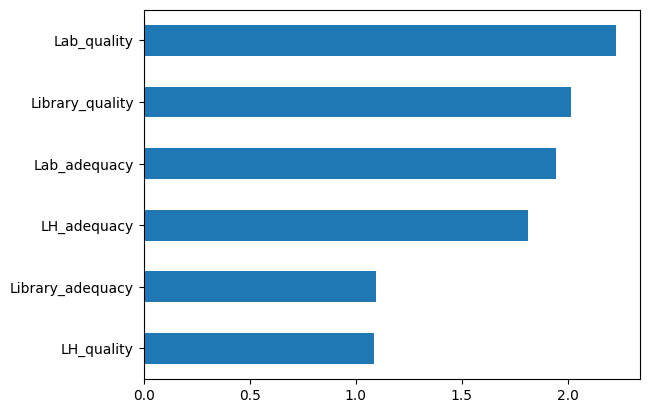

In [96]:
#plot the odds ratio
odds_ratios.plot(kind="barh")
plt.xlabel=("odds Ratio")